In [294]:
# this notebook requires my baseball-reference scraping library called sportsref.
# uncomment next line and run this cell to install:
# !pip install git+https://github.com/double-dose-larry/sportsref

In [1]:
from sportsref.baseball import Season
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse

In [3]:
# turn on xkcd plot styling
plt.xkcd()

In [4]:
%%time
# scrape data using sportsref
# this should take about 2 min

df = pd.concat([
    Season(yr)
        .batting_pages('pitches')
        .get_df('players_pitches_batting')
        .assign(year=yr)
    for yr in range(2000,2020)
])


In [6]:
#do some cleaning of the data
df = (df
      .query('Tm != "TOT"'))
df["name_clean"] = df.Name.str.replace("*","")
df["name_clean"] = df.name_clean.str.replace("\xa0"," ")
df["name_clean"] = df.name_clean.str.replace("#","")

df = df.drop_duplicates(subset=["name_clean", "year"])


In [70]:
# group data together by player and season, then calculate pitches per plate apperance
df_plot = (df.groupby(["name_clean", "year"])[["PA","Pit"]]
           .sum()
           .reset_index()
           .assign(pit_pa=lambda x: round(x.Pit/x.PA, 2)))

In [72]:
#players to highlight

Gardner = df_plot.name_clean.str.contains("Brett Gardner")
df_plot, df_Gardner = df_plot[~Gardner], df_plot[Gardner]

Werth = df_plot.name_clean.str.contains("Jayson Werth")
df_plot, df_Werth = df_plot[~Werth], df_plot[Werth]


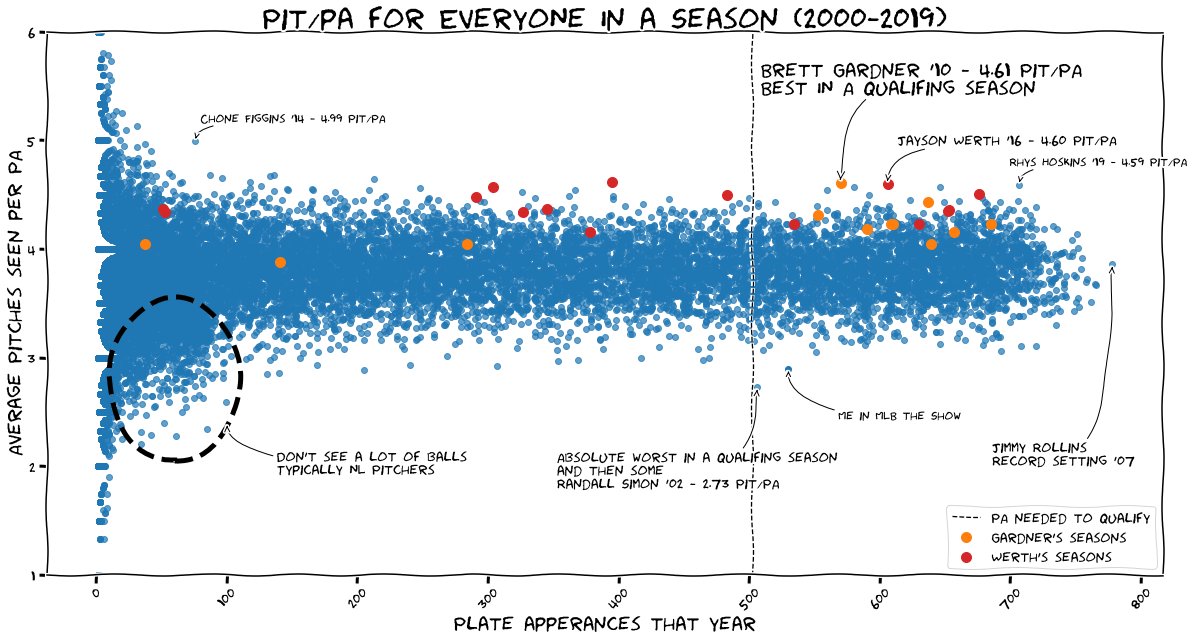

In [102]:
#plot

fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(df_plot.PA, df_plot.pit_pa, alpha=0.7)
ax.scatter(df_Gardner.PA, df_Gardner.pit_pa, color='C1', label = "Gardner's seasons", s=100 )
ax.scatter(df_Werth.PA, df_Werth.pit_pa, color='C3', label = "Werth's seasons", s=100 )


# make some notes on outliers

# Gardners best season
gard10 = df_Gardner.query("name_clean == 'Brett Gardner' and year == 2010").iloc[0]
ax.annotate("Brett Gardner '10 - 4.61 Pit/PA\nBest IN A qualifing season", 
            (gard10.PA, gard10.pit_pa),
            xytext=(-80,90),
            size=20,
            textcoords="offset pixels",
            arrowprops={"arrowstyle":"->","connectionstyle" : "angle3,angleA=0,angleB=90"}
           )


# Hoskins - close second
hoskins19 = df_plot.query("name_clean == 'Rhys Hoskins' and year == 2019").iloc[0]
ax.annotate("Rhys Hoskins '19 - 4.59 Pit/PA", 
            (hoskins19.PA, hoskins19.pit_pa),
            xytext=(-10,20),
            size=12,
            textcoords="offset pixels",
            arrowprops={"arrowstyle":"->","connectionstyle" : "angle3,angleA=0,angleB=90"}
           )

# Werth - close second
werth16 = df_Werth.query("name_clean == 'Jayson Werth' and year == 2016").iloc[0]
ax.annotate("Jayson Werth '16 - 4.60 Pit/PA", 
            (werth16.PA, werth16.pit_pa),
            xytext=(10,40),
            textcoords="offset pixels",
            arrowprops={"arrowstyle":"->","connectionstyle" : "angle3,angleA=0,angleB=90"}
           )

# #Chone Figgins
figgs14 = df_plot.query("name_clean == 'Chone Figgins' and year == 2014").iloc[0]
ax.annotate("Chone Figgins '14 - 4.99 Pit/PA", 
            (figgs14.PA, figgs14.pit_pa),
            xytext=(5,20),
            size=12,
            textcoords="offset pixels",
            arrowprops={"arrowstyle":"->","connectionstyle" : "angle3,angleA=0,angleB=90"}
           )

# #Jimmy Rollins
roll07 = df_plot.query("name_clean == 'Jimmy Rollins' and year == 2007").iloc[0]
ax.annotate("Jimmy Rollins\nRecord setting '07", 
            (roll07.PA, roll07.pit_pa),
            xytext=(-120,-200),
            textcoords="offset pixels",
            arrowprops={"arrowstyle":"->","connectionstyle" : "angle3,angleA=0,angleB=90"}
           )

# #Randall Simon
sim02 = df_plot.query("name_clean == 'Randall Simon' and year == 2002").iloc[0]
ax.annotate("Absolute worst in a qualifing season\nand then some\nRandall Simon '02 - 2.73 Pit/PA", 
            (sim02.PA, sim02.pit_pa),
            xytext=(-200,-100),
            textcoords="offset pixels",
            arrowprops={"arrowstyle":"->","connectionstyle" : "angle3,angleA=0,angleB=90"}
           )

# # add a joke about MLB the Show
joke_x, joke_y = (530, 2.9)
ax.scatter(joke_x, joke_y, color="C0")
ax.annotate("Me in MLB the Show", 
            (joke_x, joke_y),
            xytext=(50,-50),
            size=12,
            textcoords="offset pixels",
            arrowprops={"arrowstyle":"->","connectionstyle" : "angle3,angleA=0,angleB=90"}
           )

# # make a note for pitchers
ax.add_patch(Ellipse((60,2.8), 100, 1.5, 0, fill=False, ls="--", lw=5))
ax.annotate("Don't see a lot of balls\nTypically NL Pitchers", 
            (100, 2.4),
            xytext=(50,-50),
            textcoords="offset pixels",
            arrowprops={"arrowstyle":"->","connectionstyle" : "angle3,angleA=0,angleB=90"}
           )


ax.axvline(502, label="PA needed to qualify", lw=1.3, ls="--", c="k")
ax.set_ylim(1,6)
plt.xticks(rotation=45)
plt.ylabel("Average Pitches seen per PA", size=20)
plt.xlabel("Plate apperances that year", size=20)
plt.title("Pit/pa for EveryoNe In a Season (2000-2019)", size=30)
plt.legend(loc="lower right")
plt.savefig("best_taker.jpeg")